### Actividad Final modulo 5

#### 1.- Enliste todas las librerias que utilizará 

In [120]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.- Importación y revisión de los datos Importe  ambos  sets.  Dado  que  la  fuente  de  datos  proviene  de  la  misma  base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de  los  datos  (numero  de  filas/columnas,  tipos  de  datos, estadísticas básicas, casos perdidos)

In [121]:
df_2009 = pd.read_csv('2009_1perc.csv')
df_2010 = pd.read_csv('2010_1perc.csv')

In [122]:
df_2009.shape

(5812, 112)

In [123]:
df_2010.shape

(6013, 112)

In [124]:
# Columnas diferentes
columnas_aux = []
for i in df_2010.columns:
    if df_2009[i].dtype != df_2010[i].dtype:
        columnas_aux.append(i)
columnas_aux

['perobs', 'addrpct', 'linecm', 'detailcm']

In [125]:
# Comparacion de variables
print("      2009                2010")
for i in columnas_aux:
    print(f'{i}: {df_2009[i].dtype} ----> {i}: {df_2010[i].dtype}')

      2009                2010
perobs: float64 ----> perobs: int64
addrpct: int64 ----> addrpct: object
linecm: int64 ----> linecm: object
detailcm: int64 ----> detailcm: object


In [126]:
# Transformar tipo de columnas
for i in columnas_aux:
    df_2009[i] = df_2009[i].astype(object)
    df_2010[i] = df_2010[i].astype(object)
    
    df_2009[i] = pd.to_numeric(df_2009[i], errors='coerce')
    df_2010[i] = pd.to_numeric(df_2010[i], errors='coerce')

    df_2009[i] = df_2009[i].astype(float)
    df_2010[i] = df_2010[i].astype(float)

In [127]:
df_total = pd.concat([df_2009,df_2010], axis=0, ignore_index=True)

In [128]:
df_total.describe()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight,addrpct,linecm,detailcm
count,11825.000000,11825.000000,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.0,11825.0,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.000000,11824.000000,11824.0,11824.000000
mean,295983.814799,2009.508499,68.625624,5697.994334,6.364221e+06,1413.725497,2.654391,5.649556,0.0,0.0,243.354926,238.986385,7.316195e+06,28.968541,5.183340,6.408034,170.093615,68.629482,1.0,38.047023
std,170820.705702,0.499949,33.037826,5152.486022,3.429091e+06,744.726359,9.759031,9.758535,0.0,0.0,297.788599,299.394740,3.729206e+06,29.205278,0.398801,3.405503,37.195884,33.036558,0.0,25.317826
min,52.000000,2009.000000,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000,1.000000,1.0,6.000000
25%,147515.000000,2009.000000,42.000000,2002.000000,3.232009e+06,1000.000000,1.000000,3.000000,0.0,0.0,70.000000,66.000000,4.121982e+06,19.000000,5.000000,4.000000,150.000000,42.000000,1.0,20.000000
50%,296652.000000,2010.000000,73.000000,4366.000000,6.162010e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.261982e+06,25.000000,5.000000,7.000000,170.000000,73.000000,1.0,28.000000
75%,443097.000000,2010.000000,102.000000,7840.000000,9.232009e+06,2035.000000,3.000000,5.000000,0.0,0.0,177.000000,176.000000,1.105199e+07,34.000000,5.000000,9.000000,180.000000,102.000000,1.0,46.000000
max,601281.000000,2010.000000,123.000000,31694.000000,1.231201e+07,2830.000000,926.000000,857.000000,0.0,0.0,879.000000,879.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000,123.000000,1.0,113.000000


### 3. Preprocesamiento de datos  Habrá  notado  que  los  datos  parecen  tener  ciertas  inconsistencias.  Siga  los  siguientes pasos para limpiar este set: 

- 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas


In [129]:
variables_categoricas = df_total.select_dtypes(include=['object'])

In [130]:
variables_categoricas

,recstat,inout,trhsloc,crimsusp,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,...,aptnum,city,state,zip,sector,beat,post,xcoord,ycoord,dettypcm
0,A,O,P,CPW,P,Y,N,N,,N,...,,BRONX,,,G,7,,1013067,0238633,CM
1,A,O,P,BURG,P,Y,Y,N,,N,...,,QUEENS,,,J,,,1012043,0212157,CM
2,1,O,P,MISD,V,Y,N,N,,N,...,,BRONX,,,E,,,1017599,0240200,CM
3,A,O,P,MIS,P,Y,N,N,,N,...,,BROOKLYN,,,J,4,35,1002625,0183442,CM
4,A,O,P,CPW,P,Y,Y,N,,N,...,,QUEENS,,,H,,,1024535,0209890,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,1,O,H,MISD,P,Y,N,N,,N,...,,BROOKLYN,,,I,,,989382,155162,CM
11821,A,O,P,ROBBERY,R,Y,N,N,,N,...,,BROOKLYN,,,A,,,1012757,186018,CM
11822,A,O,P,GLA,P,Y,N,N,,Y,...,,STATEN IS,,,E,,,933868,138600,CM
11823,1,O,P,FELONY,P,Y,N,N,,N,...,,QUEENS,,,E,,,1014722,214388,CM


In [131]:
condicion = lambda x: (len(x.value_counts()) >= 2 and len(x.value_counts()) <= 99)
var_categoricas = variables_categoricas.apply(condicion)

In [132]:
var_categoricas[var_categoricas]

recstat     True
inout       True
trhsloc     True
typeofid    True
explnstp    True
            ... 
addrtyp     True
city        True
sector      True
beat        True
dettypcm    True
Length: 73, dtype: bool

#### 3.2 Reemplaze las siguientes clases faltantes: 

- Si  alguna  categoría  de  las  columnas  officrid,  offshld  o  offverb  es  igual  a  "" cambielo a 'N' y en caso contrario dejelo como 'Y'

In [133]:
for i in ["offshld","offverb","officrid"]:
    df_total[i].replace(df_total['offshld'].value_counts().index[0],"N",inplace=True)
    df_total[i].replace(df_total['offshld'].value_counts().index[1],"Y",inplace=True)

- Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso contrario mantenga su valor Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [134]:
for i in ["sector","trhsloc","beat"]:
    df_total[i].replace(" ","U",inplace=True)

#### 3.3  Transforme  las  columnas  ht_feet  junto  con  ht_inchen  una  única  columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [135]:
df_total["meters"] = round((df_total["ht_feet"]+df_total["ht_inch"])*0.3048,4)

In [136]:
del df_total["ht_inch"]

In [137]:
del df_total["ht_feet"]

#### 3.4  Note  que  la  fecha  viene  en  un  formato  MMDDAAAA  en  la  columna  datestop.  Genere  2  nuevas  columnas  llamadas  month  y  year  que  solo  tenga el mes y el año respectivamente

In [138]:
df_total["month"] = df_total["datestop"]//1000000

In [139]:
df_total["year"] = df_total["datestop"]%10000

#### 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

In [140]:
del df_total["datestop"]

In [141]:
del df_total["Unnamed: 0"]

### 4.- Análisis exploratorio 
#### 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

In [142]:
df_total["arstmade"].value_counts()

N    11077
Y      748
Name: arstmade, dtype: int64

<AxesSubplot:xlabel='arstmade', ylabel='count'>

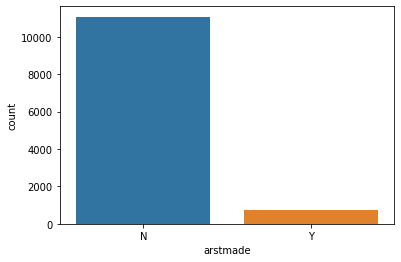

In [143]:
sns.countplot(x=df_total["arstmade"])

#### 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

<AxesSubplot:xlabel='arstmade', ylabel='count'>

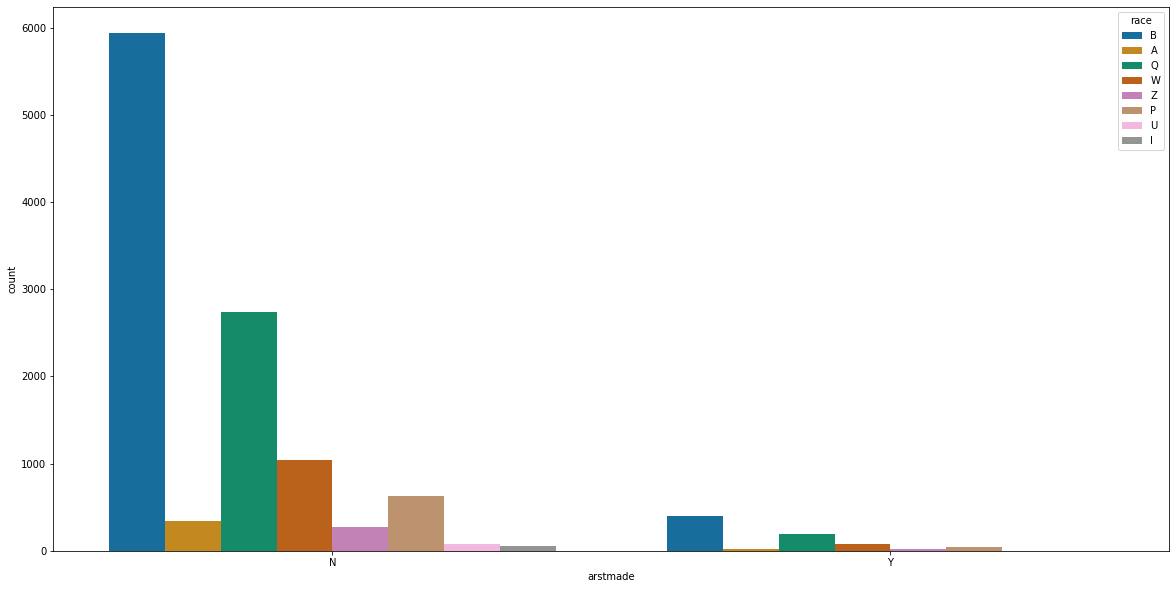

In [144]:
fig, axs = plt.subplots(figsize=(20,10))

sns.countplot(
    x="arstmade",
    data=df_total,
    hue="race",
    palette="colorblind"
)

#### 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

<AxesSubplot:xlabel='arstmade', ylabel='count'>

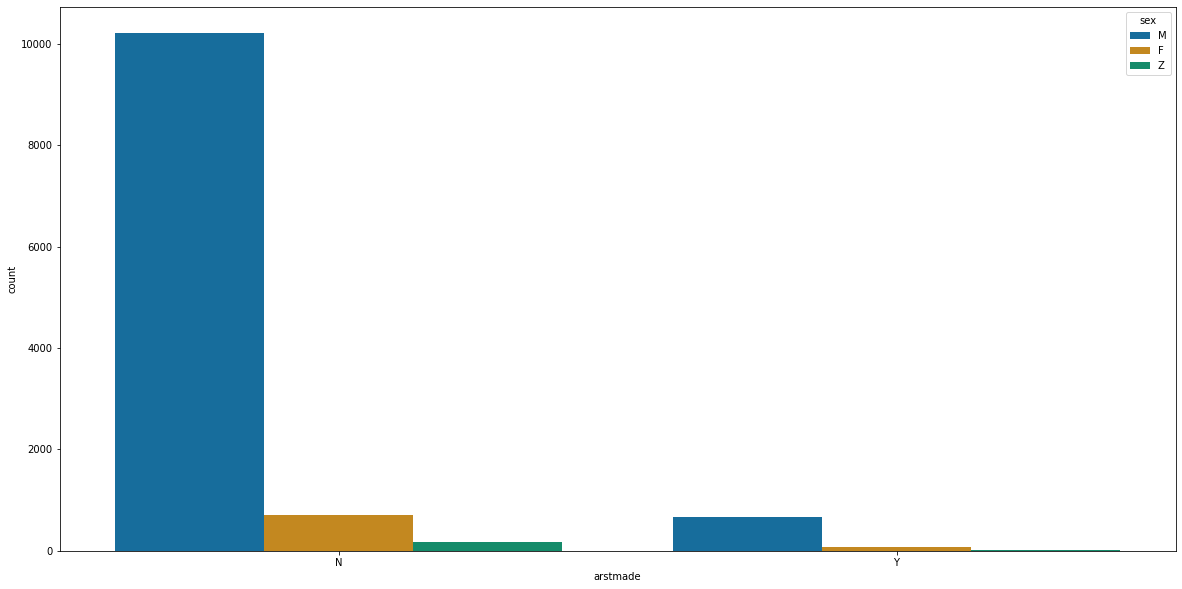

In [145]:
fig, axs = plt.subplots(figsize=(20,10))

sns.countplot(
    x="arstmade",
    data=df_total,
    hue="sex",
    palette="colorblind"
)

#### 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

In [146]:
df_total["arstmade"].replace("N",0,inplace=True)
df_total["arstmade"].replace("Y",1,inplace=True)

#### 4.5   Muestre   en   un   gráfico   la   probabilidad   que   un   individuo   sea   arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?

In [147]:
df_race_sex1 = df_total.groupby(["race","sex"])["arstmade"].value_counts('%')

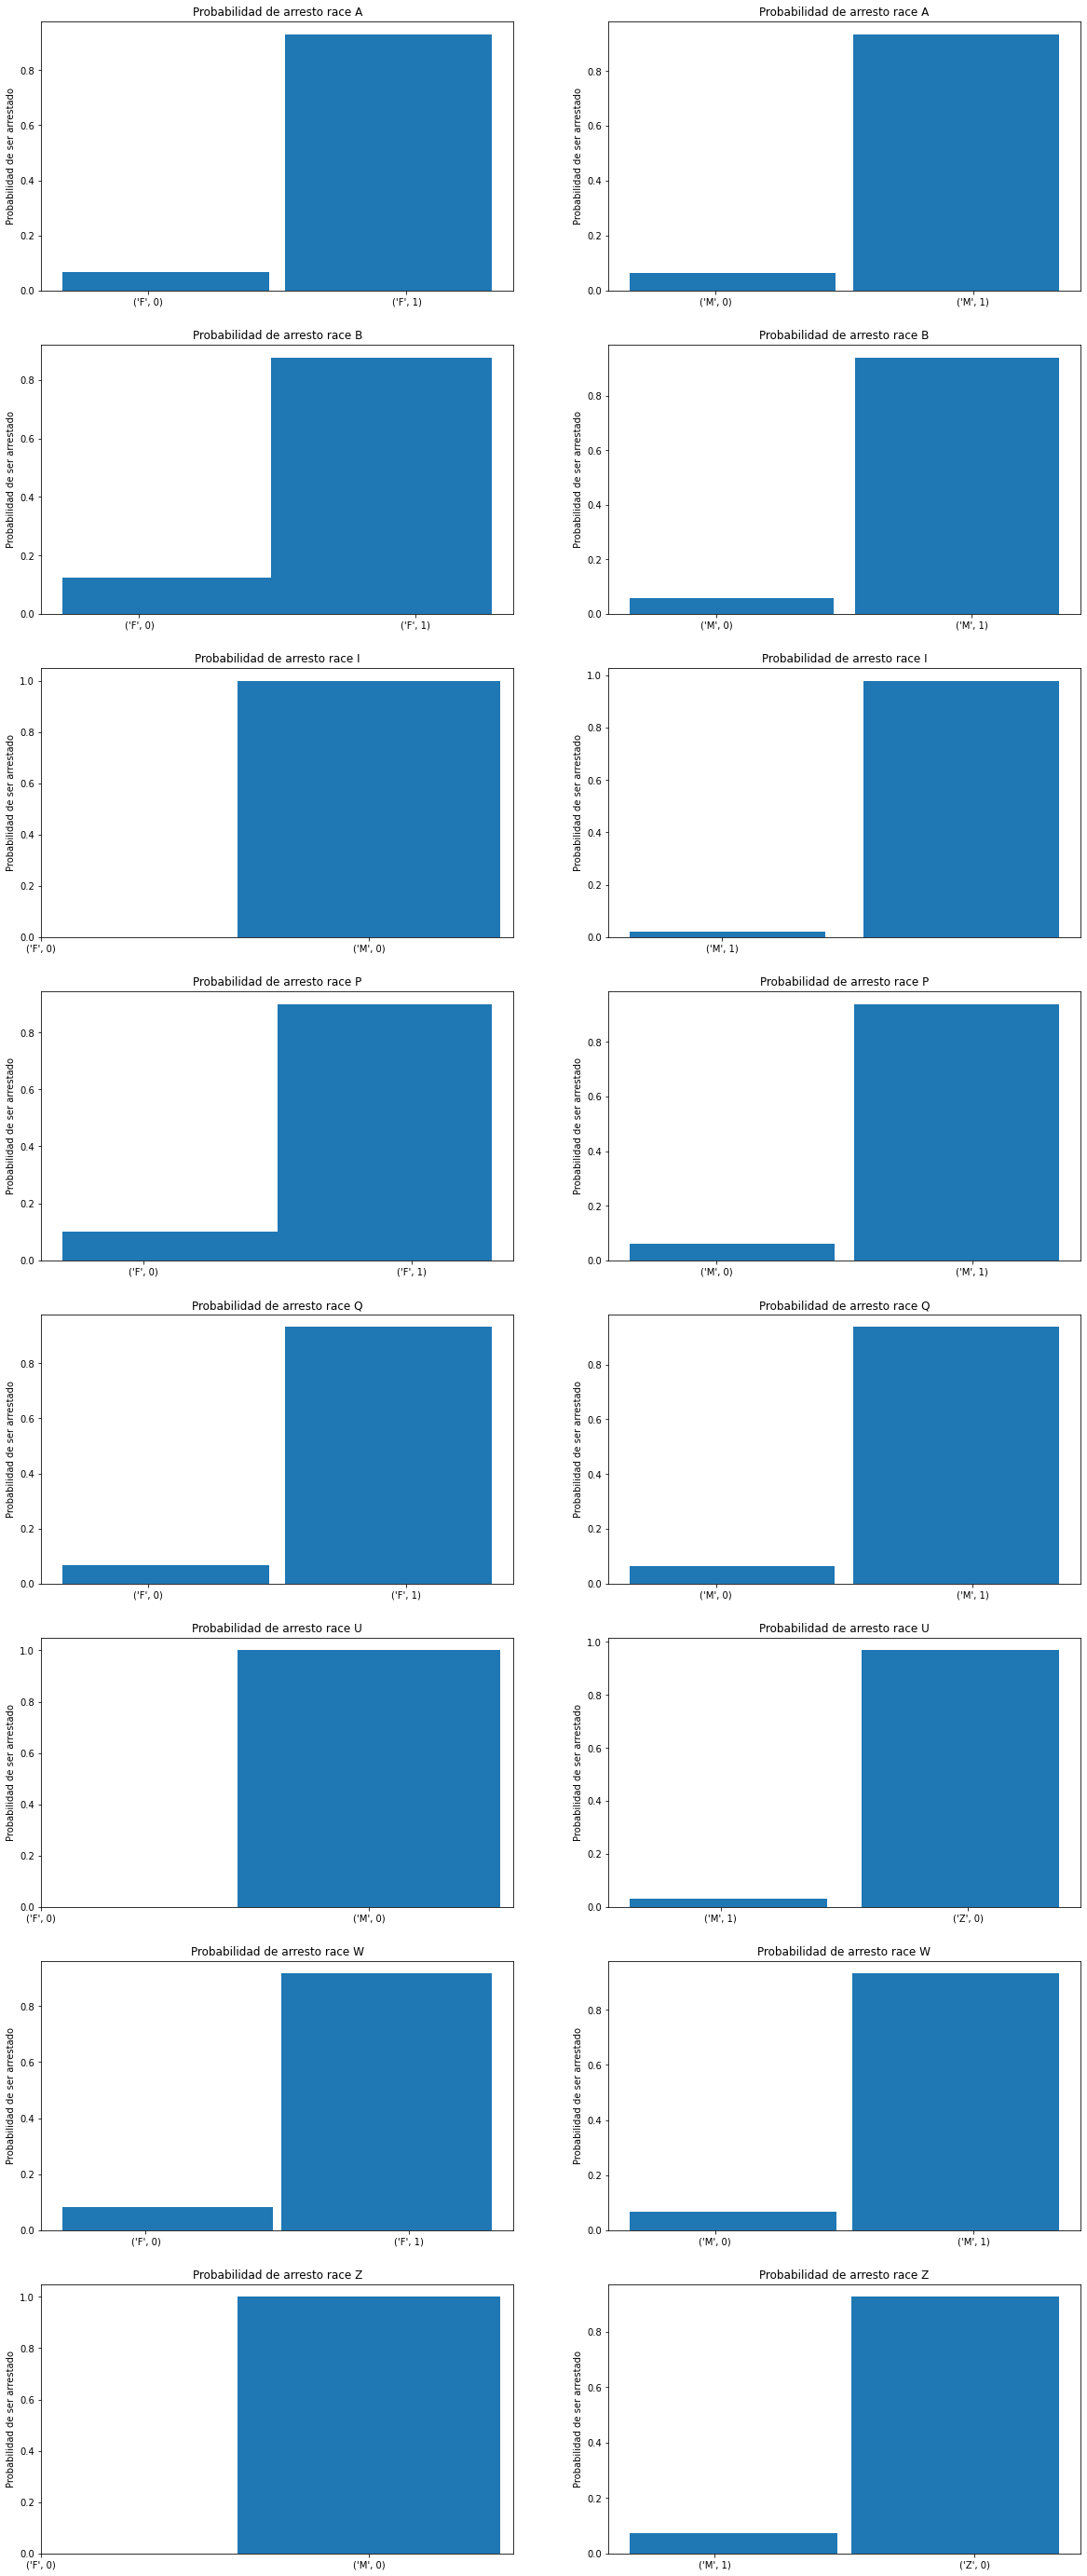

In [205]:
cont_aux_rows = 0
cont_aux_cols = 0
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 50))
for race in ['A','B','I','P','Q','U','W','Z']:
    for col in range(2):
        if col == 0:
            sexo = "F"
        else:
            sexo = "M"
        axes[cont_aux_rows][col].bar(df_race_sex1[race][sexo],df_race_sex1[race][sexo])
        axes[cont_aux_rows][col].set_ylabel('Probabilidad de ser arrestado')
        axes[cont_aux_rows][col].set_title(f"Probabilidad de arresto race {race}")
        if col == 0:
            axes[cont_aux_rows][col].set_xticks(range(len(df_race_sex1[race].index[:2])))
            axes[cont_aux_rows][col].set_xticklabels(df_race_sex1[race].index[:2])
        else:
            axes[cont_aux_rows][col].set_xticks(range(len(df_race_sex1[race].index[2:4])))
            axes[cont_aux_rows][col].set_xticklabels(df_race_sex1[race].index[2:4])
        if col == 1:
            cont_aux_rows +=1


#### 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta. Los   atributos   que   tienen   el   prefijo   pf   (['pf_hands'],['pf_wall'],   ['pf_grnd'],   ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'.Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia

In [220]:
df_total["violencia"] = (df_total["pf_hands"] == "Y") | (df_total["pf_wall"] == "Y") | (df_total["pf_grnd"] == "Y") | (df_total["pf_drwep"] == "Y") | (df_total["pf_ptwep"] == "Y") | (df_total["pf_baton"] == "Y") | (df_total["pf_hcuff"] == "Y") | (df_total["pf_pepsp"] == "Y") |(df_total["pf_other"] == "Y")

In [221]:
df_total["violencia"].replace(True,"Y",inplace=True)
df_total["violencia"].replace(False,"N",inplace=True)

In [223]:
df_total["violencia"].value_counts("%")

N    0.754165
Y    0.245835
Name: violencia, dtype: float64

#### 6.- Modelación 

#### 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar  variables  que  expliquen  lo  mismo,  ¡recuerde  que  acaba  de  crear  una  variable  a  partir  de  otras!,  además  recuerde  que  creó  una  variable  numérica  que  es  una  categoría  :)  ).  Luego  genere  los  sets  de  train-test utilizando el año 2009 para entrenar, y el año 2010 para testear.

#### 6.2 Entrene 2 modelos de clasificación y reporte el mejor modelo bajo algún criterio.